<a href="https://colab.research.google.com/github/StephanieO-jpg/Fifa-IP6/blob/master/Supervised_Learning_with_Exploratory_Data_Analysis_for_Mchezopesa_Limited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FIFA RANKINGS 

## 1. Defining the Question

> Brief history : Football,one of the world's most popular sport,is a game in where two teams of 11 players, using any part of their bodies except their hands and arms, try to maneuver the ball into the opposing team’s goal. Only the goalkeeper is permitted to handle the ball and may do so only within the penalty area surrounding the goal. The team that scores more goals wins.

### a) Specifying the Question

> I have been contracted as a football analyst by Mchezopesa Limited and I have been tasked to create a model that will predict the results of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly.

I have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### b) Defining the Metric for Success

> Achieving reliability and optimality with the created prediction model with the least RMSE score and 80% accuracy

### c) Understanding the context 

> FIFA first published a listing in rank order of its men's member associations to provide a basis for comparison of the relative strengths of these teams.


### d) Recording the Experimental Design


>1. Perform your EDA
>2. Perform any necessary feature engineering
>3. Check of multicollinearity
>4. Building a model
Approach 1: Polynomial regression model
Model 1: Predict how many goals the home team scores
Model 2: Predict how many goals the away team scores
Approach 2: Logistic regression model

>5. Predict the rank of the teams and compare the models.
>6. Use the collinearity analysis to inform the features you use in your models
>7. Cross-validate the model
>8. Compute RMSE
>9. Create residual plots for the model
>10. Using Bartlett’s test assess heteroscedacity 
>11. Challenge the solution.

### e) Data Relevance

## 2. Reading the Data

In [0]:
# import the necessary python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json as js
import datetime
import pandas_profiling as pp
import statsmodels.api as sm
import scipy

# Setting the graph styles to Seaborn one
sns.set()

# Import the KMeans module to allow for performing of the k-means clustering with sklearn
from sklearn.cluster import KMeans

from sklearn.preprocessing import LabelEncoder

In [69]:
pip install pandas-profiling

In [70]:
pip install matplotlib

In [0]:
# Loading the Dataset
# 
fifa = pd.read_csv ('fifa_ranking.csv' , parse_dates = ['rank_date'])
results = pd.read_csv ('results.csv', parse_dates = ['date'])

I have converted the date and rank date columns to a datetime object

In [72]:
# randomly preview datasets 
fifa.take (np.random.permutation(len(fifa))[:15])

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
20052,71,Jordan,JOR,0.00,498,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,AFC,2003-03-26
25198,107,Vietnam,VIE,0.00,460,-2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,AFC,2005-04-20
47480,191,Brunei Darussalam,BRU,25.80,26,0,0.00,0.00,51.60,25.80,0.00,0.00,0.00,0.00,AFC,2014-05-08
56642,116,Kyrgyz Republic,KGZ,282.39,282,-1,148.75,148.75,92.41,46.20,246.80,74.04,66.96,13.39,AFC,2018-01-18
28547,174,New Caledonia,NCL,0.00,51,-2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,OFC,2006-09-13
34552,175,Samoa,SAM,0.00,64,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,OFC,2009-02-11
52560,39,IR Iran,IRN,688.17,672,3,321.98,321.98,398.22,199.11,389.96,116.99,250.48,50.10,AFC,2016-06-02
40284,112,Faroe Islands,FRO,0.00,273,2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,2011-07-27
49409,23,Austria,AUT,916.22,881,0,599.51,599.51,433.78,216.89,204.75,61.43,191.95,38.39,UEFA,2015-03-12
3576,116,Gambia,GAM,0.00,14,-3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,1995-08-22


In [73]:
results.take (np.random.permutation(len(results))[:15])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
18679,1995-01-08,Togo,Mauritania,0,0,African Cup of Nations qualification,Lomé,Togo,False
38588,2017-01-23,Zimbabwe,Tunisia,2,4,African Cup of Nations,Libreville,Gabon,True
9905,1976-11-10,Argentina,Peru,1,0,Copa Ramón Castilla,Buenos Aires,Argentina,False
39079,2017-08-19,DR Congo,Congo,1,1,African Nations Championship,Kinshasa,DR Congo,False
17904,1993-07-25,Mexico,United States,4,0,Gold Cup,Mexico City,Mexico,False
23595,2001-02-25,Cameroon,Zambia,1,0,FIFA World Cup qualification,Yaoundé,Cameroon,False
8367,1972-11-01,Netherlands,Norway,9,0,FIFA World Cup qualification,Rotterdam,Netherlands,False
37027,2015-06-18,Székely Land,Felvidék,1,3,CONIFA European Football Cup,Debrecen,Hungary,False
38063,2016-06-15,France,Albania,2,0,UEFA Euro,Marseille,France,False
21840,1999-03-27,Georgia,Slovenia,1,1,UEFA Euro qualification,Tbilisi,Georgia,False


## 3. Checking the Data

In [74]:
# Determining the no. of records in our dataset
#
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(3), object(3)
memory usage: 7.1+ MB


The fifa dataset is seen to have 57,793 entries and a total of 16 columns

In [75]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
date          40839 non-null datetime64[ns]
home_team     40839 non-null object
away_team     40839 non-null object
home_score    40839 non-null int64
away_score    40839 non-null int64
tournament    40839 non-null object
city          40839 non-null object
country       40839 non-null object
neutral       40839 non-null bool
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


The results data set contains 40,839 entries and a total of 9 columns

In [76]:
# Previewing the top of our dataset
#
fifa.head(15)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
5,6,Republic of Ireland,IRL,0.0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
6,7,Russia,RUS,0.0,52,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
7,8,Brazil,BRA,0.0,55,-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08
8,9,Norway,NOR,0.0,49,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
9,10,Denmark,DEN,0.0,51,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [77]:
results.head(15)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [78]:
# Previewing the bottom of our dataset
# 
fifa.tail(15)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57778,197,Djibouti,DJI,31.88,27,1,0.0,0.0,63.75,31.88,0.00,0.00,0.00,0.00,CAF,2018-06-07
57779,197,Samoa,SAM,31.88,38,-6,0.0,0.0,0.00,0.00,106.25,31.88,0.00,0.00,OFC,2018-06-07
57780,199,US Virgin Islands,VIR,17.60,18,0,0.0,0.0,0.00,0.00,0.00,0.00,87.98,17.60,CONCACAF,2018-06-07
57781,200,Sri Lanka,SRI,16.76,17,0,0.0,0.0,8.50,4.25,25.50,7.65,24.29,4.86,AFC,2018-06-07
57782,201,Pakistan,PAK,10.17,10,2,0.0,0.0,0.00,0.00,0.00,0.00,50.83,10.17,AFC,2018-06-07
57783,202,Cayman Islands,CAY,8.50,9,2,0.0,0.0,0.00,0.00,0.00,0.00,42.50,8.50,CONCACAF,2018-06-07
57784,203,San Marino,SMR,7.92,8,2,0.0,0.0,0.00,0.00,0.00,0.00,39.60,7.92,UEFA,2018-06-07
57785,204,British Virgin Islands,VGB,4.25,4,2,0.0,0.0,0.00,0.00,0.00,0.00,21.25,4.25,CONCACAF,2018-06-07
57786,204,Montserrat,MSR,4.25,17,-4,0.0,0.0,0.00,0.00,0.00,0.00,21.25,4.25,CONCACAF,2018-06-07
57787,206,Turks and Caicos Islands,TCA,0.00,13,-4,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,2018-06-07


In [79]:
results.tail(15)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40824,2019-07-15,Tonga,Vanuatu,0,14,Pacific Games,Apia,Samoa,True
40825,2019-07-15,Fiji,Tuvalu,10,1,Pacific Games,Apia,Samoa,True
40826,2019-07-15,Solomon Islands,American Samoa,13,0,Pacific Games,Apia,Samoa,True
40827,2019-07-15,Tahiti,New Caledonia,0,3,Pacific Games,Apia,Samoa,True
40828,2019-07-15,North Korea,Tajikistan,1,0,Intercontinental Cup,Ahmedabad,India,True
40829,2019-07-16,India,Syria,1,1,Intercontinental Cup,Ahmedabad,India,False
40830,2019-07-17,Tunisia,Nigeria,0,1,African Cup of Nations,Cairo,Egypt,True
40831,2019-07-18,Papua New Guinea,Tonga,8,0,Pacific Games,Apia,Samoa,True
40832,2019-07-18,Samoa,Vanuatu,0,11,Pacific Games,Apia,Samoa,False
40833,2019-07-18,New Caledonia,Tuvalu,11,0,Pacific Games,Apia,Samoa,True


In [80]:
# Checking whether each column has an appropriate datatype
#
fifa.dtypes

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

In [81]:
results.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

# CLEANING

In [82]:
#renaming rank date column 
fifa.rename(columns={"rank_date": "date"}, inplace = True)
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'date'],
      dtype='object')

In [83]:
# check for duplicates 
fifa.duplicated().sum()

37

In [84]:
results.duplicated().sum()

0

In [85]:
# dropping duplicates
fifa.drop_duplicates(inplace=True)
fifa.duplicated().sum()

0

In [86]:
# join the two tables
FIFA=pd.merge(results, fifa, on='date')

FIFA.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
1,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
2,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
3,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA
4,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL


In [87]:
pp.ProfileReport(FIFA)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,24
Number of observations,212798
Total Missing (%),0.0%
Total size in memory,39.2 MiB
Average record size in memory,193.0 B
Numeric,6
Categorical,8
Boolean,1
Date,1
Text (Unique),0
Rejected,8


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

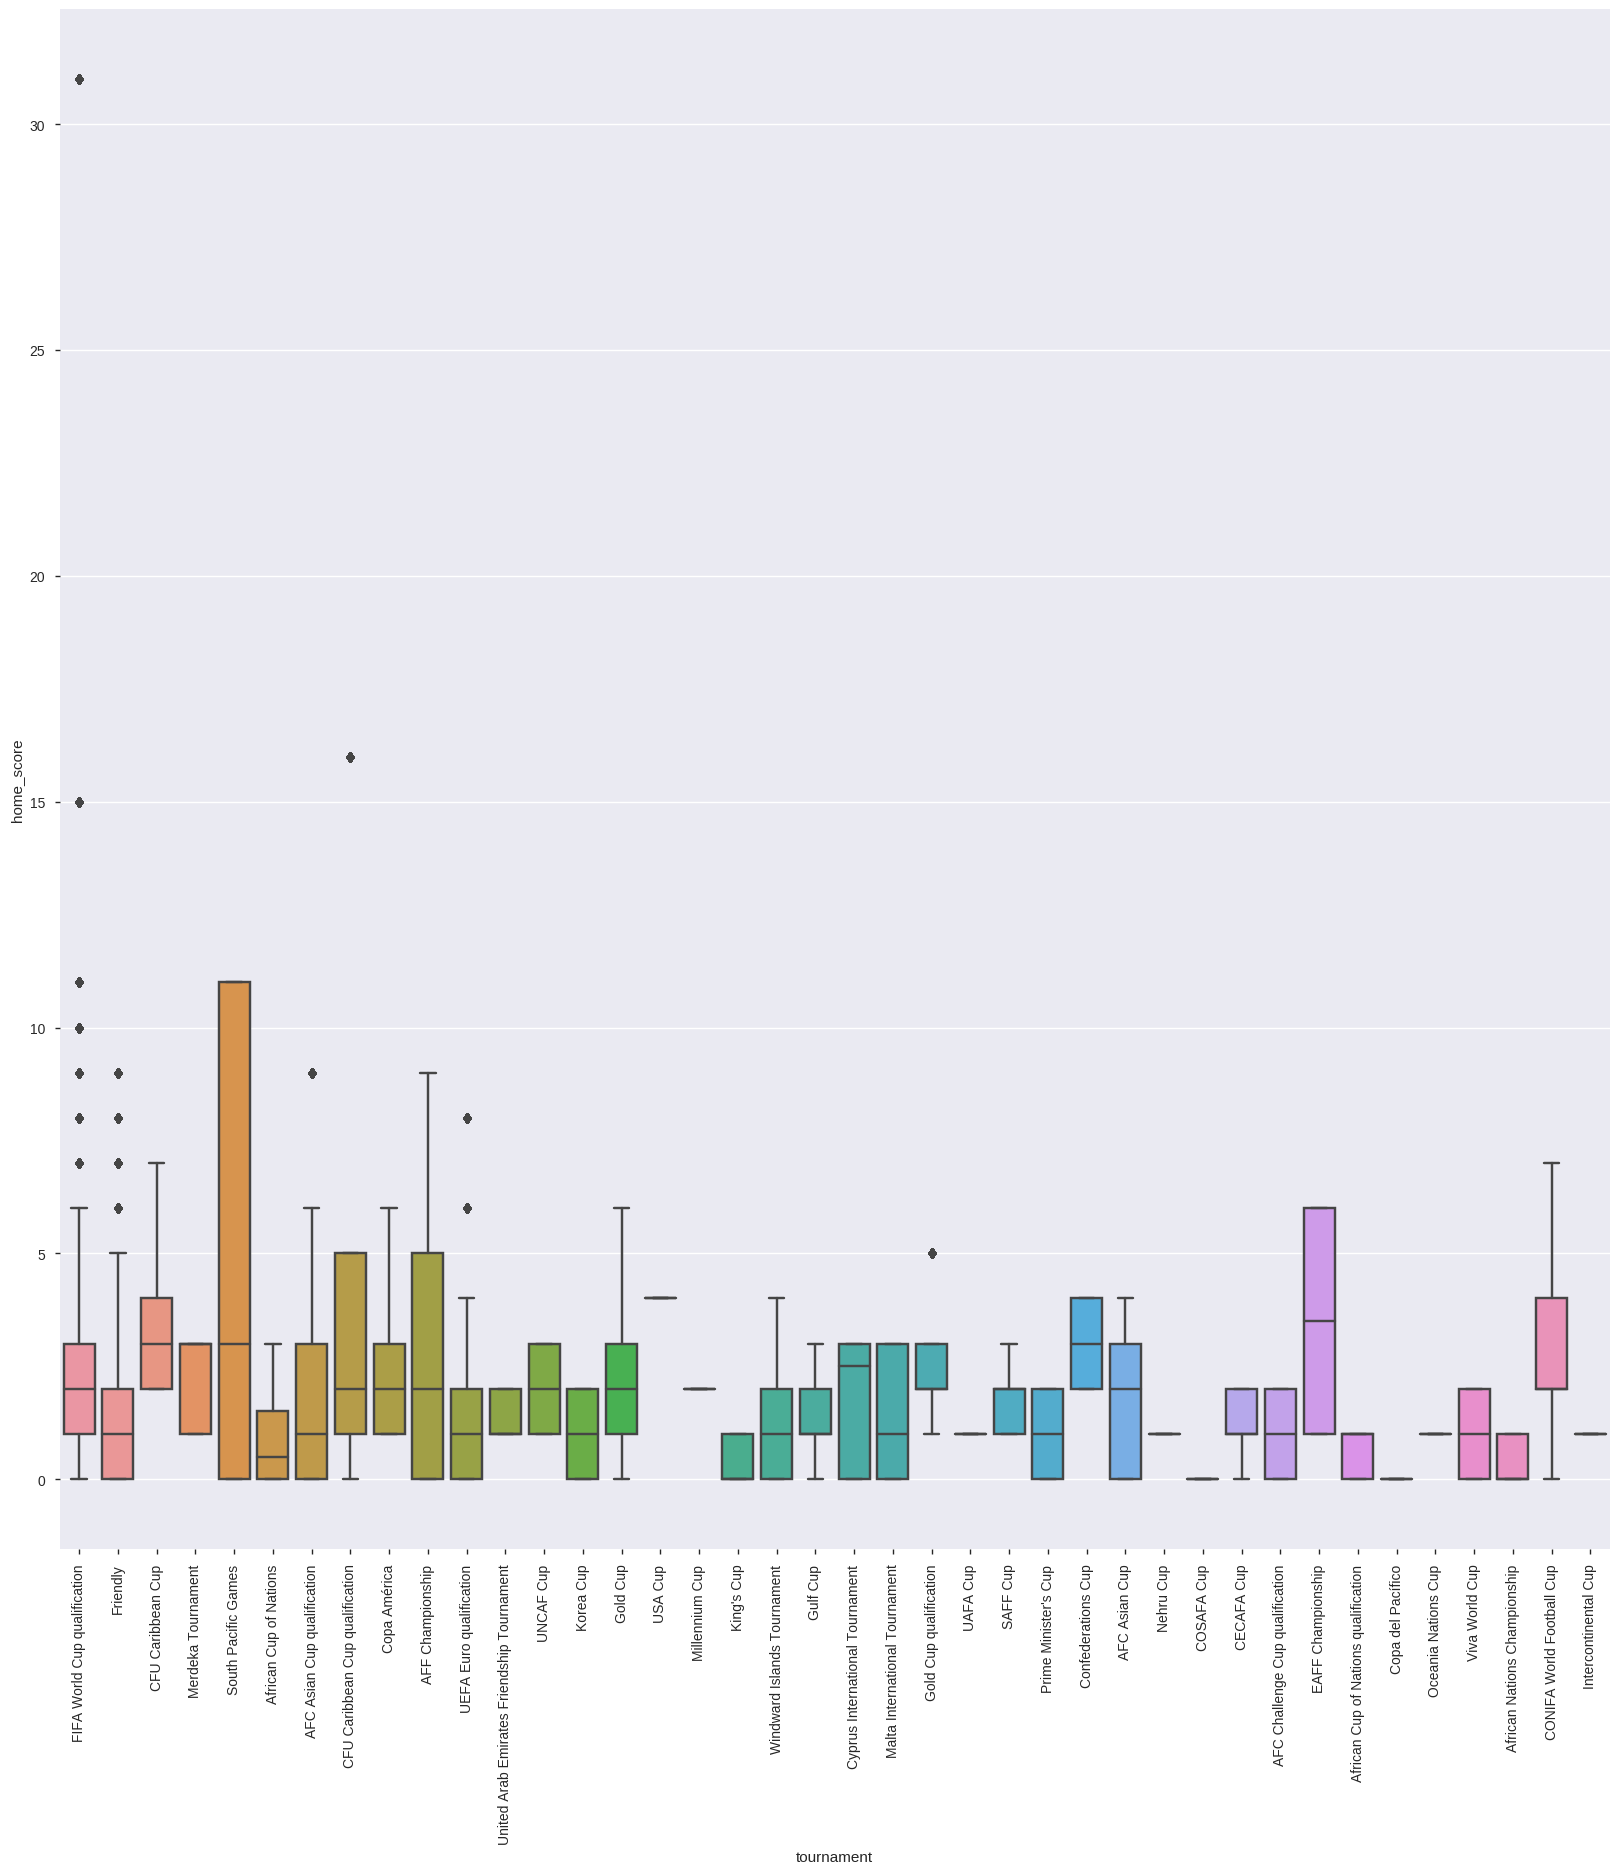

In [88]:
# Checking for Outliers
#

plt.figure(figsize = (20,20))
ax = sns.boxplot(x="tournament", y="home_score", data=FIFA)
plt.xticks(rotation = 90)
plt.tight_layout
plt.show()

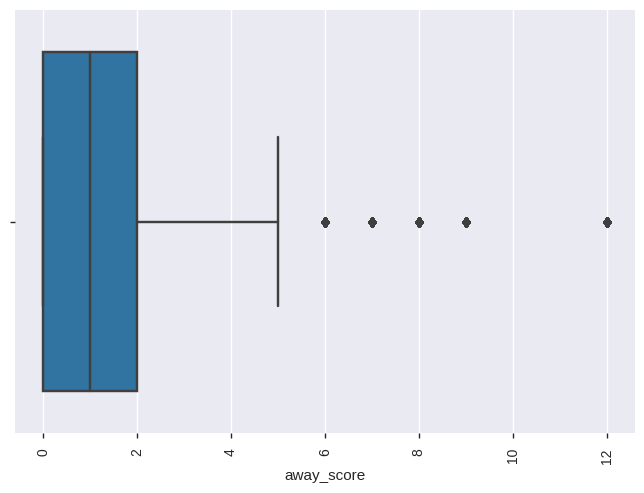

<Figure size 10000x10000 with 0 Axes>

In [89]:
ax = sns.boxplot(x="away_score", data=FIFA)
plt.xticks(rotation = 90)
plt.figure(figsize = (100,100))
plt.show()

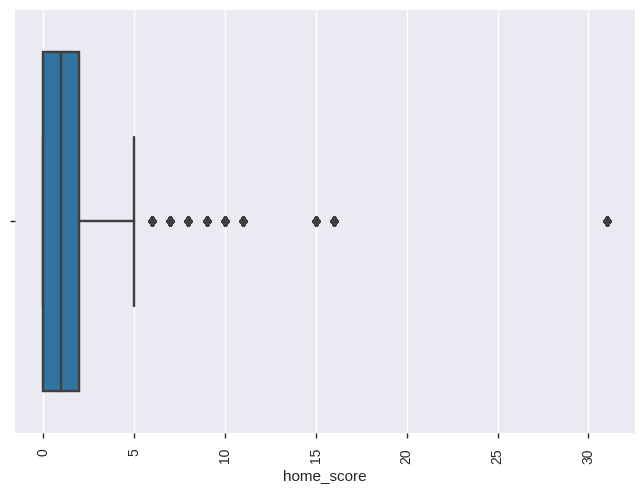

<Figure size 10000x10000 with 0 Axes>

In [90]:
ax = sns.boxplot(x="home_score", data=FIFA)
plt.xticks(rotation = 90)
plt.figure(figsize = (100,100))
plt.show()

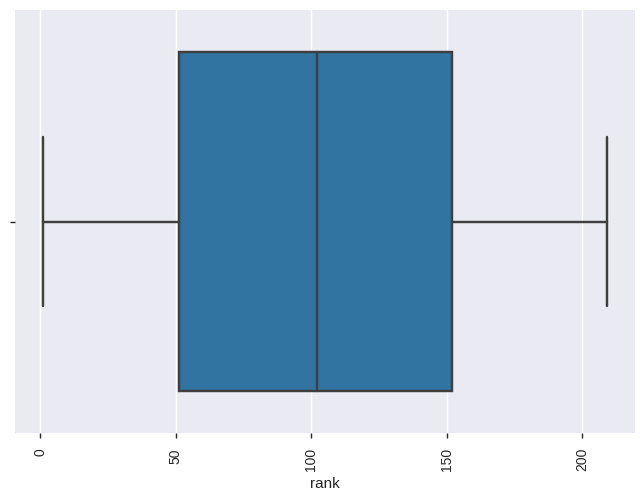

<Figure size 10000x10000 with 0 Axes>

In [91]:
ax = sns.boxplot(x="rank",data=FIFA)
plt.xticks(rotation = 90)
plt.figure(figsize = (100,100))
plt.show()

In [92]:
# Identifying the Missing Data
#
FIFA.isnull().sum()

date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
dtype: int64

In [0]:
# More data cleaning procedures
#

## 6. Exploratory Analysis

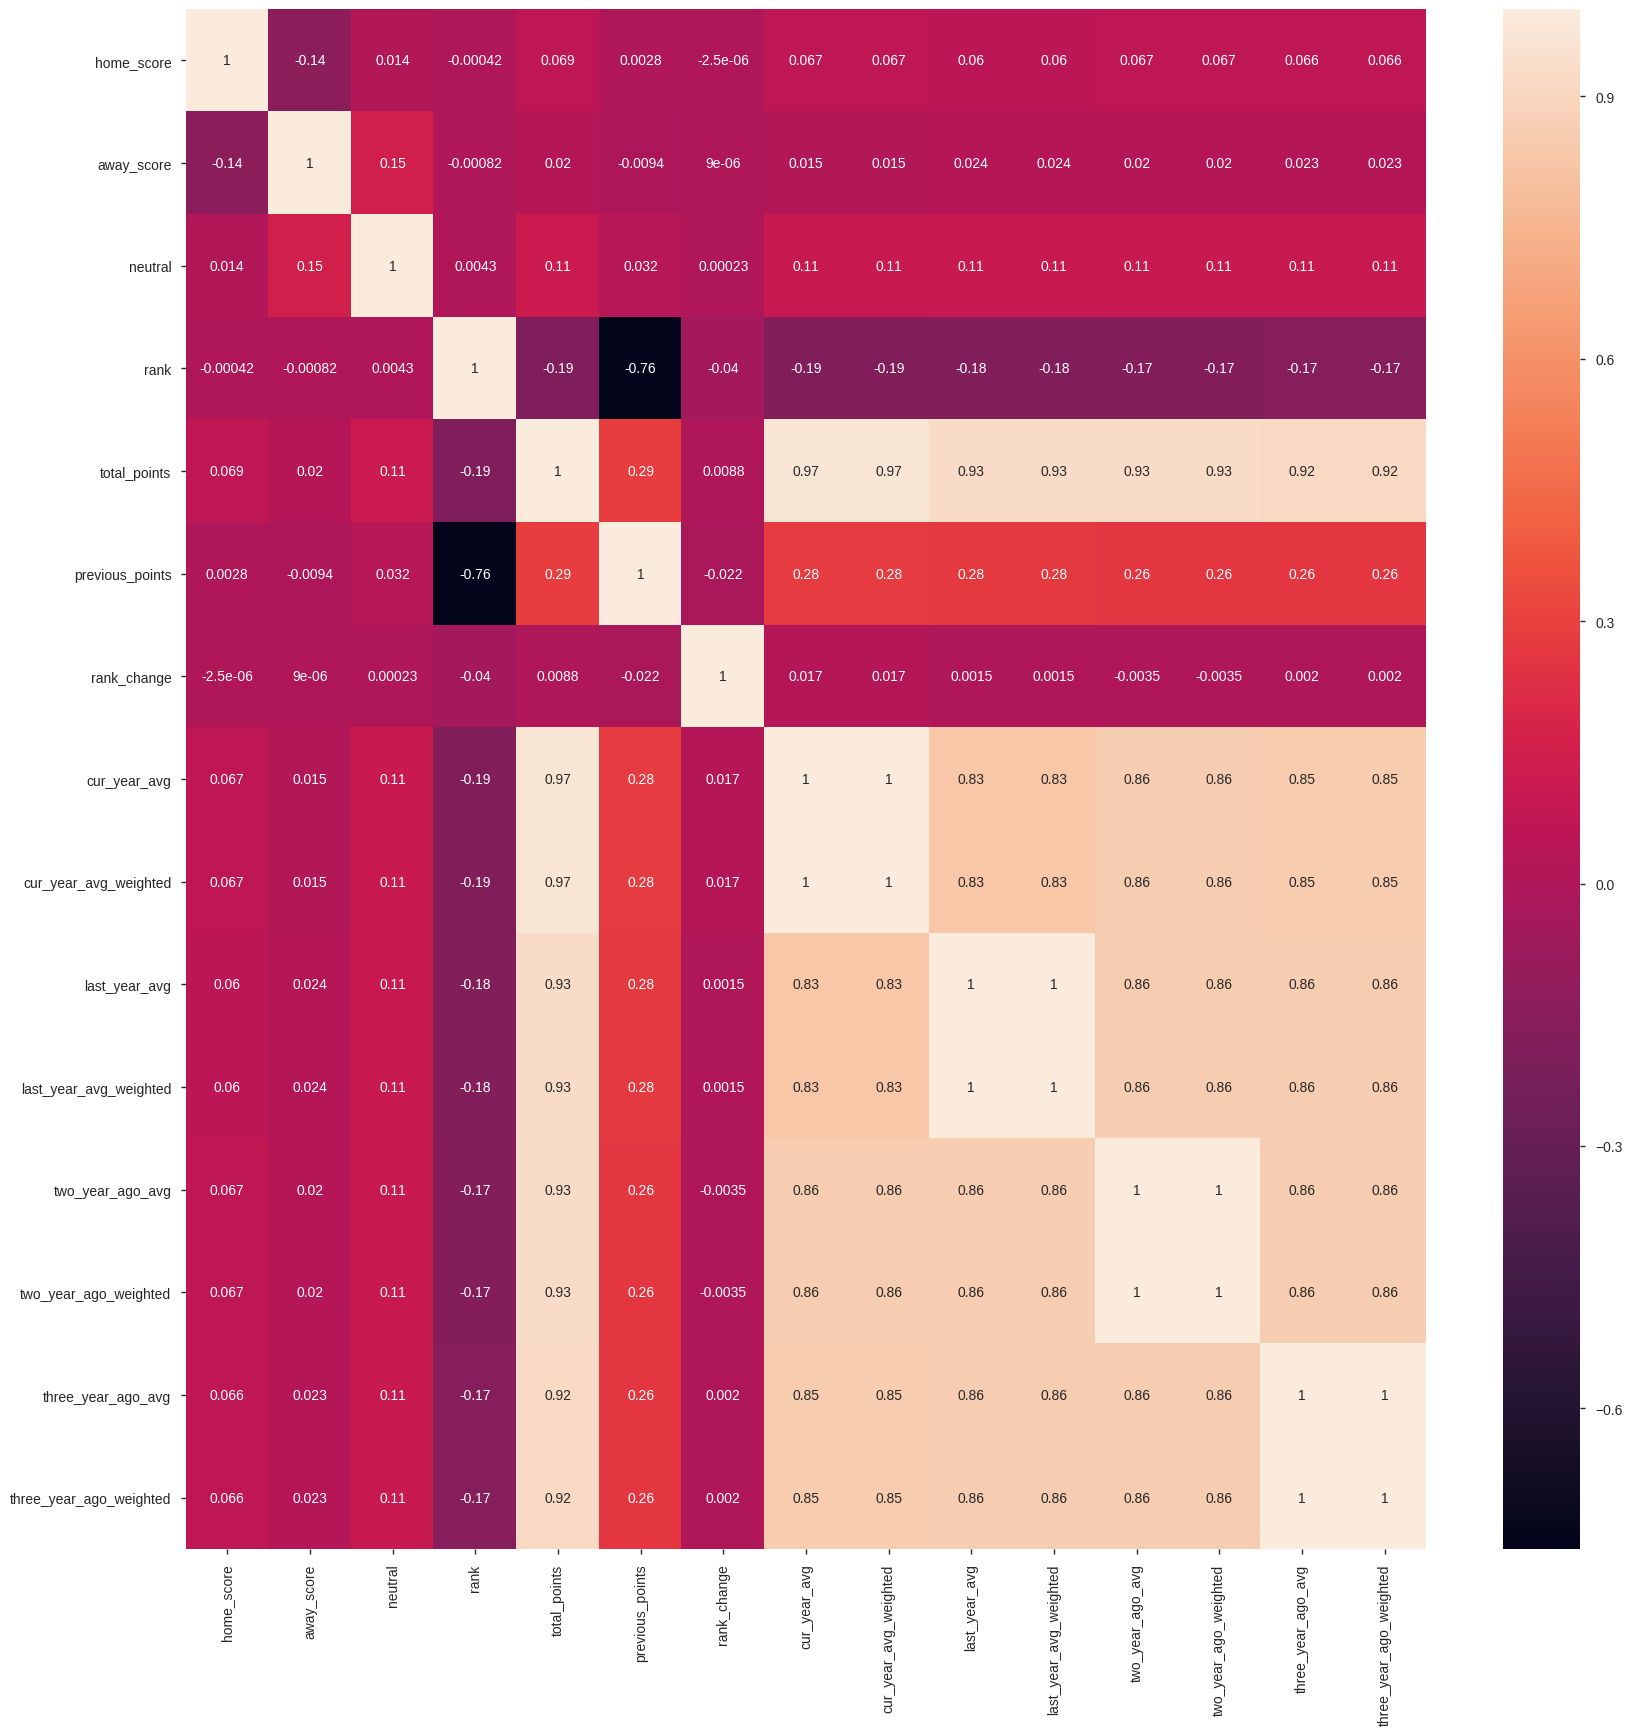

In [94]:
# Ploting the correlation summaries and recording our observations
#
#correlation between columns
corr1 = FIFA.corr()
corr1
plt.figure(figsize = (20,20))
sns.heatmap(corr1,annot=True )

In [95]:
# showing the correlation matrix
corr=FIFA.corr()
corr

,home_score,away_score,neutral,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
home_score,1.000000,-0.144320,0.014064,-0.000415,0.068507,0.002814,-0.000003,0.066670,0.066670,0.060127,0.060127,0.067186,0.067186,0.065770,0.065770
away_score,-0.144320,1.000000,0.153324,-0.000821,0.019914,-0.009375,0.000009,0.015030,0.015030,0.024219,0.024219,0.019694,0.019694,0.022869,0.022869
neutral,0.014064,0.153324,1.000000,0.004328,0.113989,0.032355,0.000234,0.106518,0.106518,0.108571,0.108571,0.111161,0.111161,0.110022,0.110022
rank,-0.000415,-0.000821,0.004328,1.000000,-0.191495,-0.760988,-0.040393,-0.187572,-0.187572,-0.180723,-0.180723,-0.172142,-0.172142,-0.167970,-0.167970
total_points,0.068507,0.019914,0.113989,-0.191495,1.000000,0.290998,0.008784,0.970797,0.970797,0.929709,0.929709,0.927109,0.927109,0.915350,0.915351
previous_points,0.002814,-0.009375,0.032355,-0.760988,0.290998,1.000000,-0.022361,0.282132,0.282132,0.277482,0.277482,0.263492,0.263492,0.259394,0.259394
rank_change,-0.000003,0.000009,0.000234,-0.040393,0.008784,-0.022361,1.000000,0.016702,0.016702,0.001524,0.001524,-0.003519,-0.003519,0.002024,0.002024
cur_year_avg,0.066670,0.015030,0.106518,-0.187572,0.970797,0.282132,0.016702,1.000000,1.000000,0.831299,0.831299,0.858883,0.858884,0.849690,0.849690
cur_year_avg_weighted,0.066670,0.015030,0.106518,-0.187572,0.970797,0.282132,0.016702,1.000000,1.000000,0.831299,0.831299,0.858883,0.858884,0.849690,0.849690
last_year_avg,0.060127,0.024219,0.108571,-0.180723,0.929709,0.277482,0.001524,0.831299,0.831299,1.000000,1.000000,0.857344,0.857344,0.857613,0.857614


In [96]:
# checking for multicollinearity
# Using the variance Inflation Factor (VIF)
# 
# This is calculated using linear algebra inverse function

pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# From the correlation matrix below there are no correlated independent variables as all have VIF below 5, which is the threshold

,home_score,away_score,neutral,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
home_score,1.028348e+00,1.546722e-01,-3.021505e-02,6.642637e-03,-9.275605e+02,2.582708e-02,1.247591e-03,4.435910e+09,-4.435121e+09,1.279207e+03,-1.025458e+03,4.171639e+01,1.017750e+02,5.247187e+02,-4.270615e+02
away_score,1.546848e-01,1.048454e+00,-1.619523e-01,3.219567e-02,2.520605e+02,4.542085e-02,2.072453e-03,-2.166189e+09,2.166302e+09,-6.488760e+02,5.798728e+02,-1.324507e+02,9.342820e+01,-2.637193e+02,2.371551e+02
neutral,-3.005805e-02,-1.620374e-01,1.040247e+00,-6.680024e-02,-3.386232e+02,-5.459771e-02,-3.873223e-03,2.966686e+09,-2.965830e+09,7.229063e+02,-6.305708e+02,3.142355e+01,2.091087e+01,2.077528e+02,-1.721356e+02
rank,6.595566e-03,3.220998e-02,-6.693995e-02,2.406044e+00,-4.199894e+02,1.857839e+00,1.390166e-01,3.056020e+09,-3.057377e+09,8.051217e+02,-6.894678e+02,2.900542e+02,-2.249170e+02,5.089616e+02,-4.646975e+02
total_points,1.258128e+03,-9.299414e+02,-3.068796e+02,1.514139e+03,-4.434679e+09,-3.293506e+03,4.071558e+01,4.039102e+16,-4.039102e+16,9.741033e+09,-8.527092e+09,5.331985e+08,1.532209e+08,2.842873e+09,-2.375884e+09
previous_points,2.610118e-02,4.529530e-02,-5.431039e-02,1.857996e+00,6.516022e+02,2.530799e+00,1.351448e-01,-2.940006e+09,2.939973e+09,-1.403592e+03,1.225022e+03,-7.972092e+00,-9.289537e+01,-3.475387e+02,2.789166e+02
rank_change,1.383836e-03,1.993603e-03,-3.935439e-03,1.391565e-01,-8.523700e+02,1.347868e-01,1.010324e+00,4.330925e+09,-4.330858e+09,1.169270e+03,-9.359692e+02,-9.022757e+01,2.222222e+02,3.536278e+02,-2.638593e+02
cur_year_avg,-3.864360e+07,-9.988813e+07,-1.506936e+09,4.173519e+08,-2.096636e+16,-2.560270e+09,-1.323042e+09,4.183717e+22,-4.183715e+22,1.250126e+16,-6.761996e+15,2.358709e+15,8.865552e+14,4.271241e+15,-2.063384e+15
cur_year_avg_weighted,3.864294e+07,9.988861e+07,1.506936e+09,-4.173527e+08,2.096636e+16,2.560272e+09,1.323042e+09,-4.183719e+22,4.183718e+22,-1.250126e+16,6.762001e+15,-2.358710e+15,-8.865553e+14,-4.271243e+15,2.063385e+15
last_year_avg,-4.057009e+01,1.246621e+01,4.930737e+01,-1.675060e+02,6.276677e+08,-1.641589e+02,6.169474e+01,-5.898077e+15,5.898077e+15,5.943865e+08,-7.662023e+08,-7.624701e+07,-2.090619e+07,-4.031511e+08,3.370557e+08


VIFs Values greater than 5 indicate that the presence of multicollinearity.From the correlation matrix there are no correlated independent variables as all have VIF values are below 5, which is the threshold.

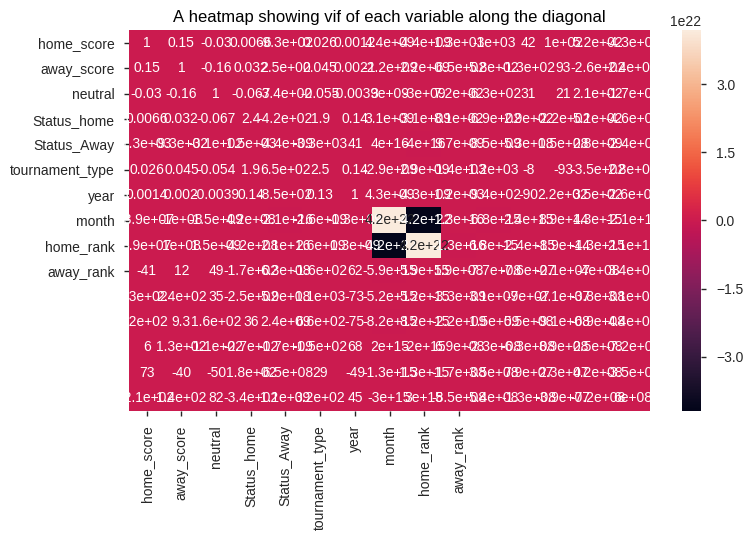

In [97]:
# Visualising Variance Inflation Factor
vif = np.linalg.inv(corr.values)
sns.heatmap(vif, annot = True, xticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'], yticklabels=['home_score' ,'away_score' ,'neutral', 'Status_home' , 'Status_Away' , 'tournament_type' , 'year', 'month' , 'home_rank' ,'away_rank'])
plt.title('A heatmap showing vif of each variable along the diagonal', color = 'black' )
plt.tight_layout()
plt.show()

In [98]:
# describing the columns

FIFA.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
home_score,212798.0,1.682098,1.969885,0.0,0.0,1.0,2.0,31.00
away_score,212798.0,1.046951,1.257602,0.0,0.0,1.0,2.0,12.00
rank,212798.0,101.864012,58.649297,1.0,51.0,102.0,152.0,209.00
total_points,212798.0,42.556582,163.890165,0.0,0.0,0.0,0.0,1770.06
previous_points,212798.0,341.234626,295.103291,0.0,71.0,297.0,531.0,1920.00
rank_change,212798.0,-0.009502,4.537499,-62.0,-1.0,0.0,1.0,71.00
cur_year_avg,212798.0,21.481468,85.357707,0.0,0.0,0.0,0.0,1126.04
cur_year_avg_weighted,212798.0,21.481468,85.357707,0.0,0.0,0.0,0.0,1126.04
last_year_avg,212798.0,21.100183,89.725337,0.0,0.0,0.0,0.0,1169.57
last_year_avg_weighted,212798.0,10.550111,44.862704,0.0,0.0,0.0,0.0,584.79


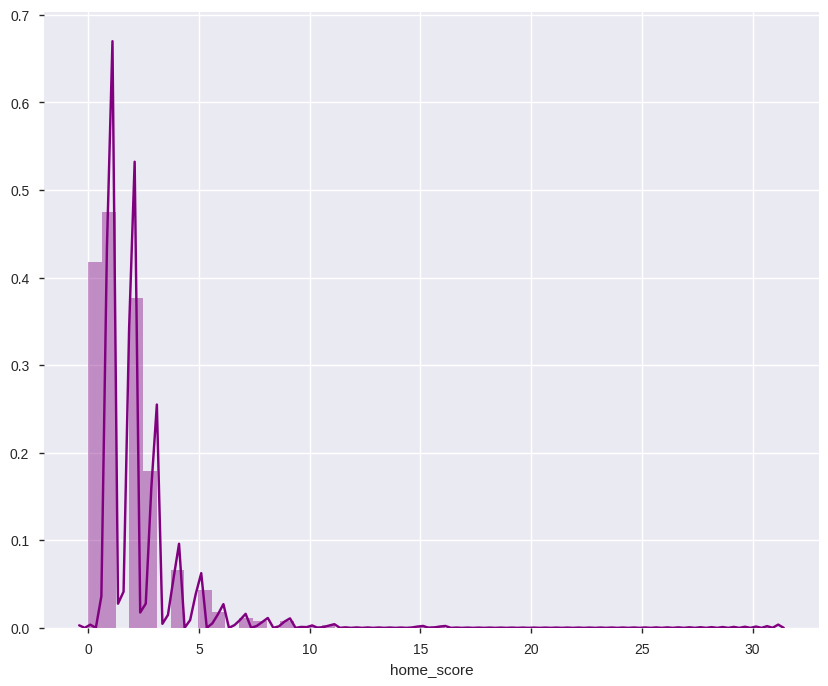

In [99]:
# show the distribution of the dataset in accordance to home team and away team
# right skew - positive skew
# left skew - negative skew
# normal curve/distribution - symmetricaly distrubuted with no skew therefore all  tails of teh curve are equally the same

# homescore
plt.figure(figsize = (10,8)) 
plt.tight_layout
sns.distplot(FIFA['home_score'], color = 'purple') 
plt.show()

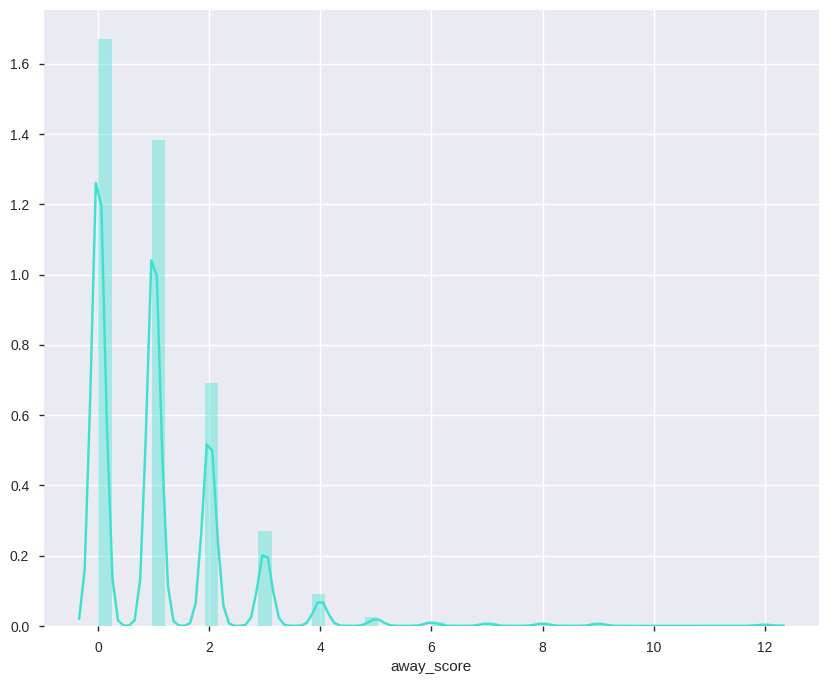

In [100]:
# away score
plt.figure(figsize = (10,8)) 
plt.tight_layout
sns.distplot(FIFA['away_score'], color = 'turquoise') 
plt.show()

As can be seen above both the home score and away have a long right tail, indicating that they are skewed to the right which is the postive side of the number line,hence a postive skew.

The above histograms show that the home teams are more likely to score at most one goal compared to the away team.

# Feature Engineering

In [101]:
# definig the winning team and losing team by creating a new column and differentiating data from the home score column and away score 
FIFA["results"] = FIFA['home_score'] - FIFA['away_score']
FIFA.take (np.random.permutation(len(FIFA))[:15])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,results
105943,2005-08-17,Austria,Scotland,2,2,Friendly,Graz,Austria,False,77,Panama,PAN,0.00,515,6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CONCACAF,0
48840,2000-10-11,Slovakia,Sweden,0,0,FIFA World Cup qualification,Bratislava,Slovakia,False,189,Pakistan,PAK,0.00,79,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,AFC,0
19232,1998-03-18,Romania,Israel,0,1,Friendly,Bucharest,Romania,False,9,Japan,JPN,0.00,58,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,AFC,-1
118792,2006-08-16,Finland,Northern Ireland,1,2,Friendly,Helsinki,Finland,False,10,Czech Republic,CZE,0.00,1223,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,-1
115940,2006-08-16,Austria,Hungary,1,2,Friendly,Graz,Austria,False,28,Turkey,TUR,0.00,824,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,UEFA,-1
136564,2007-08-22,Tunisia,Guinea,1,1,Friendly,Tunis,Tunisia,False,188,Guinea-Bissau,GNB,0.00,18,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,0
85333,2003-11-19,Norway,Spain,0,3,UEFA Euro qualification,Oslo,Norway,False,105,Gabon,GAB,0.00,415,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,CAF,-3
211157,2018-06-07,India,New Zealand,1,2,Intercontinental Cup,Mumbai,India,False,48,Nigeria,NGA,617.79,635,-1,251.21,251.21,474.22,237.11,198.21,59.46,350.01,70.00,CAF,-1
79838,2003-03-26,Mexico,Paraguay,1,1,Friendly,San Diego,United States,True,119,Tahiti,TAH,0.00,382,-3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,OFC,0
16625,1997-08-20,Turkey,Wales,6,4,FIFA World Cup qualification,Istanbul,Turkey,False,90,Malaysia,MAS,0.00,33,-1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,AFC,2


In [0]:
def home_team(home_goals):
    if home_goals > 0:
        return 'win'
    elif home_goals < 0:
        return 'loss'
    else:
        return 'draw'
      
FIFA['home_status'] = FIFA.results.apply(lambda x: home_team(x))

In [0]:
def away_team(away_goals):
    if away_goals > 0:
        return 'win'
    elif away_goals < 0:
        return 'loss'
    else:
        return 'draw'
      
FIFA['away_status'] = FIFA.results.apply(lambda s: away_team(s))

In [104]:
# preview dataset to confirm whether the result column has been iterated
FIFA.take (np.random.permutation(len(FIFA))[:15])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,results,home_status,away_status
71127,2002-05-15,Switzerland,Canada,1,3,Friendly,St. Gallen,Switzerland,False,146,Suriname,SUR,0.00,263,-1,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,CONCACAF,-2,loss,loss
178164,2010-09-15,India,Namibia,2,0,Friendly,New Delhi,India,False,178,Dominica,DMA,0.00,33,0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,CONCACAF,2,win,win
33130,1999-06-16,Thailand,New Zealand,2,2,Friendly,Bangkok,Thailand,False,53,Bolivia,BOL,0.00,515,-3,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,CONMEBOL,0,draw,draw
156849,2010-03-03,Austria,Denmark,2,1,Friendly,Vienna,Austria,False,185,Dominica,DMA,0.00,38,-3,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,CONCACAF,1,win,win
136020,2007-08-22,Tajikistan,Azerbaijan,2,3,Friendly,Dushanbe,Tajikistan,False,61,South Africa,RSA,0.00,479,3,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,CAF,-1,loss,loss
206437,2016-06-02,Maldives,Yemen,0,2,AFC Asian Cup qualification,Malé,Maldives,False,167,Bermuda,BER,134.72,135,2,53.98,53.98,161.5,80.75,0.0,0.0,0.0,0.0,CONCACAF,-2,loss,loss
132047,2007-08-22,Lesotho,Laos,3,1,Merdeka Tournament,Petaling Jaya,Malaysia,True,40,Egypt,EGY,0.00,687,2,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,CAF,2,win,win
25655,1998-08-19,Sweden,Russia,1,0,Friendly,Örebro,Sweden,False,76,Switzerland,SUI,0.00,37,-3,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,UEFA,1,win,win
128700,2007-08-22,Bosnia and Herzegovina,Croatia,3,5,Friendly,Sarajevo,Bosnia and Herzegovina,False,21,Uruguay,URU,0.00,949,-2,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,CONMEBOL,-2,loss,loss
37724,1999-10-13,Argentina,Colombia,2,1,Friendly,Córdoba,Argentina,False,1,Brazil,BRA,0.00,838,0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,CONMEBOL,1,win,win


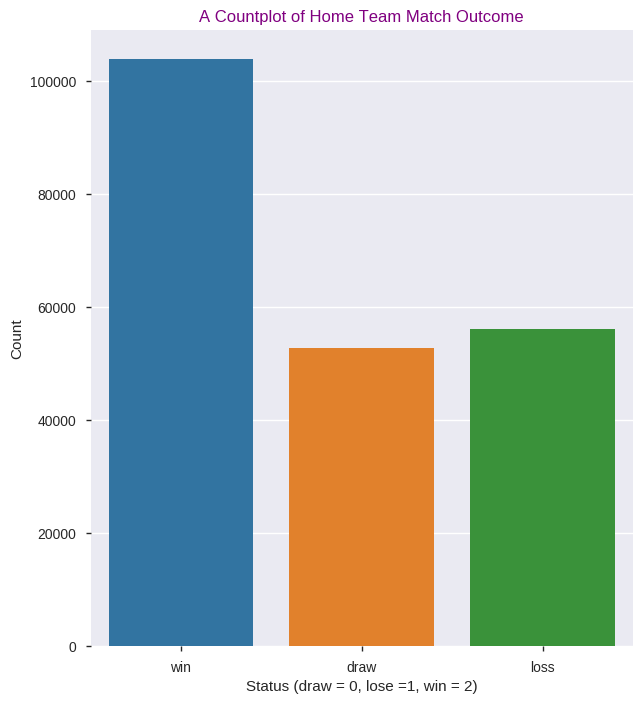

In [105]:
# using a countplot to visualize the results
plt.figure(figsize = (7,8), dpi = 100)
sns.countplot(FIFA['home_status'])
plt.xlabel('Status (draw = 0, lose =1, win = 2)')
plt.ylabel('Count')
plt.title('A Countplot of Home Team Match Outcome', color = 'Purple')
plt.show()

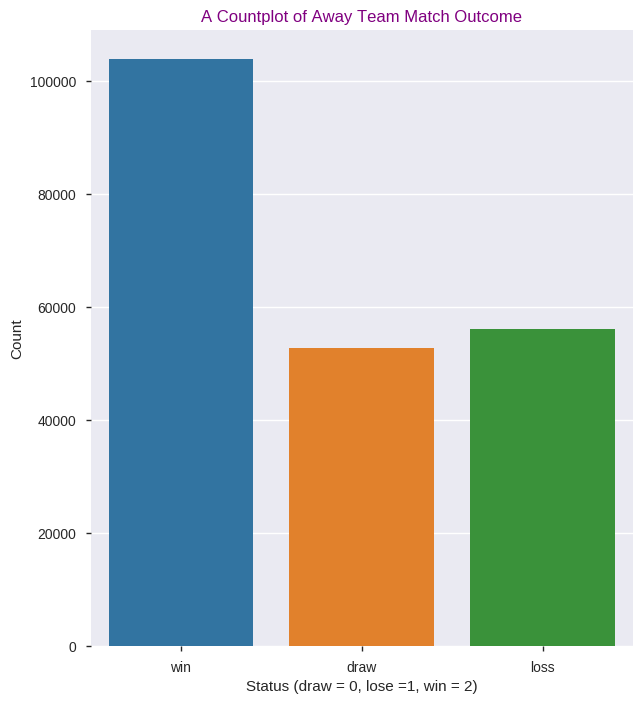

In [106]:
plt.figure(figsize = (7,8), dpi = 100)
sns.countplot(FIFA['away_status'])
plt.xlabel('Status (draw = 0, lose =1, win = 2)')
plt.ylabel('Count')
plt.title('A Countplot of Away Team Match Outcome', color = 'Purple')
plt.show()

In [0]:
# Slitting tournament type into three categories 
# Tournament type (World cup, Friendly, Other)

def tona(typ):
    if typ == 'Friendly':
        return 'Friendly'
    elif typ == 'FIFA World Cup':
        return 'World cup'
    else:
        return 'Other'
      
FIFA['tournament_type'] = FIFA.tournament.apply(lambda q: tona(q))

In [108]:
FIFA.take (np.random.permutation(len(FIFA))[:15])

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,results,home_status,away_status,tournament_type
195539,2013-06-06,China PR,Uzbekistan,1,2,Friendly,Guangzhou,China PR,False,137,St Kitts and Nevis,SKN,218.00,218,0,66.00,66.00,176.0,88.00,189.75,56.93,35.36,7.07,CONCACAF,-1,loss,loss,Friendly
61942,2002-02-13,Italy,United States,1,0,Friendly,Catania,Italy,False,96,Lithuania,LTU,0.00,447,1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,UEFA,1,win,win,Friendly
208498,2017-06-01,Mexico,Republic of Ireland,3,1,Friendly,East Rutherford,United States,True,132,Kyrgyz Republic,KGZ,232.60,250,-4,92.41,92.41,255.8,127.90,0.00,0.00,61.46,12.29,AFC,2,win,win,Friendly
65649,2002-04-17,Belize,Nicaragua,7,1,Friendly,Belize,Belize,False,149,Bangladesh,BAN,0.00,247,-1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,AFC,6,win,win,Friendly
68749,2002-04-17,Mexico,Bulgaria,1,0,Friendly,East Rutherford,United States,True,1,France,FRA,0.00,807,0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,UEFA,1,win,win,Friendly
49574,2000-11-15,Barbados,United States,0,4,FIFA World Cup qualification,Bridgetown,Barbados,False,111,Venezuela,VEN,0.00,379,-6,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,CONMEBOL,-4,loss,loss,Other
93077,2004-02-18,Malaysia,Hong Kong,1,3,FIFA World Cup qualification,Kuantan,Malaysia,False,97,Turkmenistan,TKM,0.00,460,-1,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,AFC,-2,loss,loss,Other
57551,2001-04-11,Australia,American Samoa,31,0,FIFA World Cup qualification,Coffs Harbour,Australia,False,171,Vanuatu,VAN,0.00,163,0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,OFC,31,win,win,Other
133059,2007-08-22,Mexico,Colombia,0,1,Friendly,Commerce City,United States,True,12,England,ENG,0.00,1097,0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,UEFA,-1,loss,loss,Friendly
11689,1996-09-25,Saudi Arabia,Zambia,1,3,Friendly,Dammam,Saudi Arabia,False,112,St Kitts and Nevis,SKN,0.00,20,-3,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,CONCACAF,-2,loss,loss,Friendly


In [109]:
# Checking the number of unique values in the tournament column

FIFA.tournament_type.unique()

array(['Other', 'Friendly'], dtype=object)

In [0]:
# Create a label encoder object
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

We have created a label encoder object so that we may be able to change the neutral and result columns to integers so as to perfrom modelling 

In [111]:
# Fit the encoder to the neutral column
le.fit(FIFA['neutral'])

LabelEncoder()

In [112]:
# converting the neutral column to numerical data
FIFA['neutral_num'] = le.transform(FIFA['neutral'])
FIFA.take (np.random.permutation(len(FIFA))[:15])
# true-1
# false-0

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,results,home_status,away_status,tournament_type,neutral_num
63632,2002-02-13,Saudi Arabia,Denmark,0,1,Friendly,Riyadh,Saudi Arabia,False,162,Laos,LAO,0.00,203,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,AFC,-1,loss,loss,Friendly,0
42280,2000-02-16,United States,Peru,1,0,Gold Cup,Miami,United States,False,113,Malta,MLT,0.00,308,3,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,UEFA,1,win,win,Other,0
155234,2009-06-03,Tanzania,New Zealand,2,1,Friendly,Dar es Salaam,Tanzania,False,19,Ukraine,UKR,0.00,832,3,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,UEFA,1,win,win,Friendly,0
168560,2010-08-11,Azerbaijan,Kuwait,1,1,Friendly,Baku,Azerbaijan,False,97,Panama,PAN,0.00,323,-3,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,CONCACAF,0,draw,draw,Friendly,0
175418,2010-08-11,Senegal,Cape Verde,1,0,Friendly,Dakar,Senegal,False,124,Chad,CHA,0.00,185,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,CAF,1,win,win,Friendly,0
177212,2010-08-11,Turkey,Romania,2,0,Friendly,Istanbul,Turkey,False,55,Mali,MLI,0.00,548,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,CAF,2,win,win,Friendly,0
136012,2007-08-22,Tajikistan,Azerbaijan,2,3,Friendly,Dushanbe,Tajikistan,False,53,Canada,CAN,0.00,562,-1,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,CONCACAF,-1,loss,loss,Friendly,0
129307,2007-08-22,Costa Rica,Peru,1,1,Friendly,San José,Costa Rica,False,4,France,FRA,0.00,1357,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,UEFA,0,draw,draw,Friendly,0
29314,1998-11-18,Malta,North Macedonia,1,2,UEFA Euro qualification,Attard,Malta,False,21,Austria,AUT,0.00,54,1,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,UEFA,-1,loss,loss,Other,0
53732,2000-11-15,Trinidad and Tobago,Panama,1,0,FIFA World Cup qualification,Port of Spain,Trinidad and Tobago,False,6,Spain,ESP,0.00,745,-1,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,UEFA,1,win,win,Other,0


In [113]:
# Fit the encoder to the results column
le.fit(FIFA['results'])

LabelEncoder()

In [114]:
# converting the result column to numerical data
FIFA['result_num'] = le.transform(FIFA['results'])
FIFA.take (np.random.permutation(len(FIFA))[:15])
# draw - 0
# loss - 1
# win - 2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,results,home_status,away_status,tournament_type,neutral_num,result_num
167944,2010-08-11,Angola,Uruguay,0,2,Friendly,Lisbon,Portugal,True,102,Guinea,GUI,0.00,286,-1,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,CAF,-2,loss,loss,Friendly,1,8
89682,2004-02-18,Estonia,Moldova,1,0,Malta International Tournament,Attard,Malta,True,171,Central African Republic,CTA,0.00,182,0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,CAF,1,win,win,Other,1,11
4652,1996-01-24,Burkina Faso,Algeria,1,2,African Cup of Nations,Port Elizabeth,South Africa,True,9,Norway,NOR,0.00,55,1,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,UEFA,-1,loss,loss,Other,1,9
193369,2012-08-08,Zambia,Zimbabwe,2,1,Friendly,Ndola,Zambia,False,57,Sierra Leone,SLE,528.64,488,8,363.08,363.08,273.48,136.74,0.0,0.0,144.08,28.82,CAF,1,win,win,Friendly,0,11
105349,2005-06-15,Germany,Australia,4,3,Confederations Cup,Frankfurt am Main,Germany,False,98,Panama,PAN,0.00,484,-3,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,CONCACAF,1,win,win,Other,0,11
91528,2004-02-18,Jamaica,Uruguay,2,0,Friendly,Kingston,Jamaica,False,181,Cambodia,CAM,0.00,148,-3,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,AFC,2,win,win,Friendly,0,12
2796,1994-05-17,Poland,Austria,3,4,Friendly,Katowice,Poland,False,111,Luxembourg,LUX,0.00,11,2,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,UEFA,-1,loss,loss,Friendly,0,9
173812,2010-08-11,Morocco,Equatorial Guinea,2,1,Friendly,Rabat,Morocco,False,173,Laos,LAO,0.00,39,0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,AFC,1,win,win,Friendly,0,11
48654,2000-10-11,Slovakia,Sweden,0,0,FIFA World Cup qualification,Bratislava,Slovakia,False,3,Argentina,ARG,0.00,752,0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,CONMEBOL,0,draw,draw,Other,0,10
140153,2008-06-04,Mexico,Argentina,1,4,Friendly,San Diego,United States,True,49,Belgium,BEL,0.00,627,-3,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,UEFA,-3,loss,loss,Friendly,1,7


# Regression

In [0]:
# 
# Defining the dependent and independent variables

X = FIFA[['rank','result_num','neutral_num']]
y = FIFA[['home_score']]



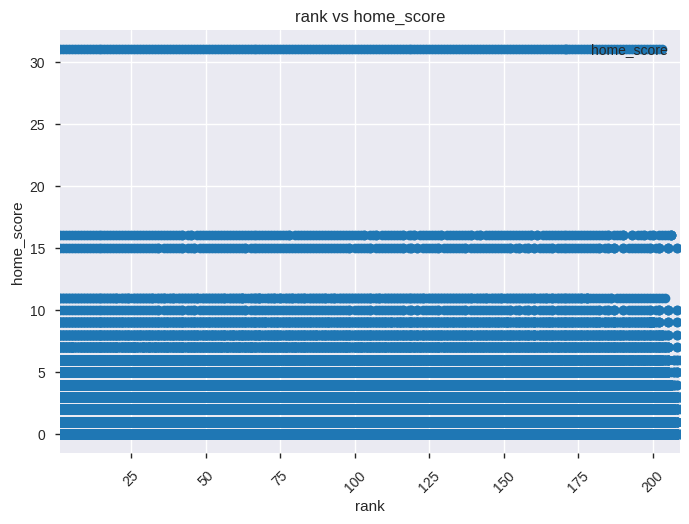

In [116]:
FIFA.plot(x = 'rank',y ='home_score',style = 'o')
plt.xlabel('rank')
plt.xticks(rotation = 45)
plt.ylabel('home_score')
plt.title('rank vs home_score')
plt.show()

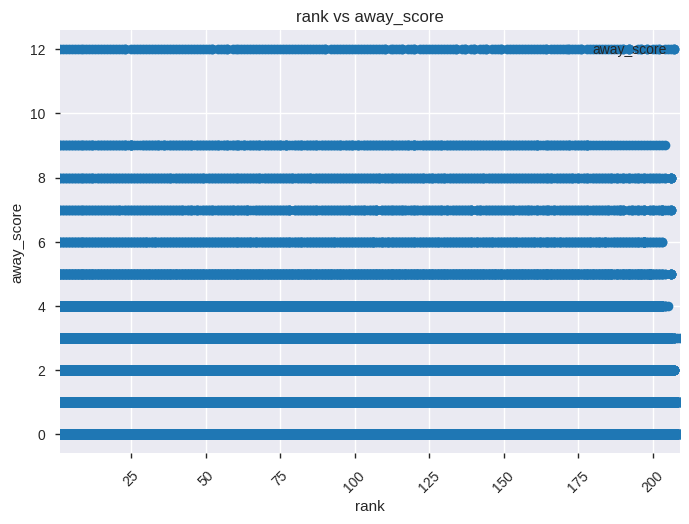

In [117]:
FIFA.plot(x = 'rank', y = 'away_score',style = 'o')
plt.xlabel('rank')
plt.xticks(rotation=45)
plt.ylabel('away_score')
plt.title('rank vs away_score')
plt.show()

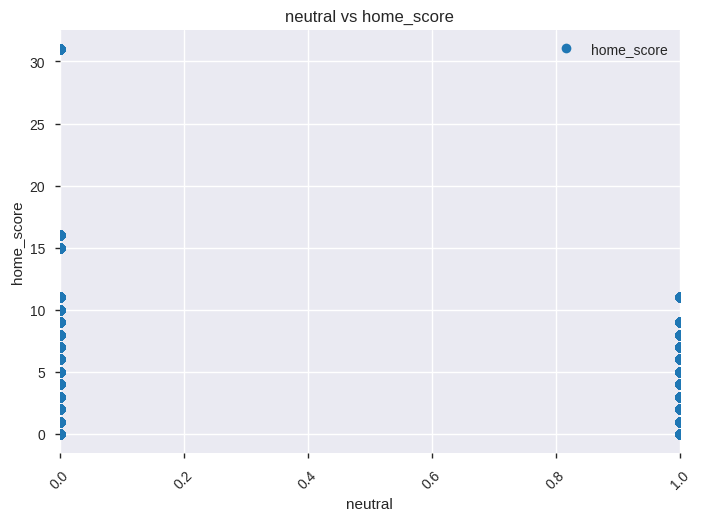

In [118]:
FIFA.plot(x = 'neutral_num', y = 'home_score',style = 'o')
plt.xlabel('neutral')
plt.xticks(rotation=45)
plt.ylabel('home_score')
plt.title('neutral vs home_score')
plt.show()

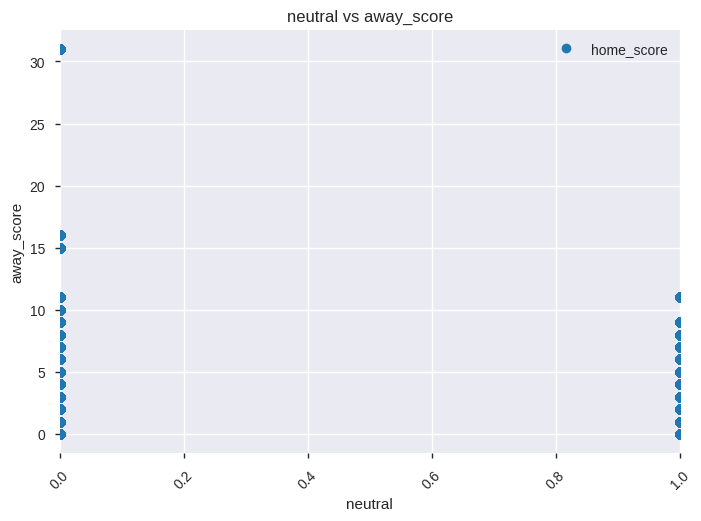

In [119]:
FIFA.plot(x = 'neutral_num', y = 'home_score',style = 'o')
plt.xlabel('neutral')
plt.xticks(rotation=45)
plt.ylabel('away_score')
plt.title('neutral vs away_score')
plt.show()

As can be seen in the scatter plots above, none of the data plotted gives a linear regression therefore making it hard to find the line of best fit

In [120]:
# training the dataset
# checking the x and y variables for null values 
X.isnull().sum()

rank           0
result_num     0
neutral_num    0
dtype: int64

In [121]:
y.isnull().sum()

home_score    0
dtype: int64

In [0]:
# splitting the dataset into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [123]:
# fitting into a linear regression
from sklearn.linear_model import LinearRegression
reg_line = LinearRegression()
reg_line.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [124]:
# Retrieving the intercept:
print(reg_line.intercept_)
# retrieving the slope:
print(reg_line.coef_)

[-5.84342837]
[[-4.88142694e-05  7.03537644e-01  3.42402320e-01]]


In [125]:
#making predictions
y_pred = reg_line.predict(X_test )
y_pred

array([[-0.22078968],
       [ 1.18921446],
       [ 0.47986792],
       ...,
       [ 0.48387069],
       [ 1.5313239 ],
       [ 2.59882809]])

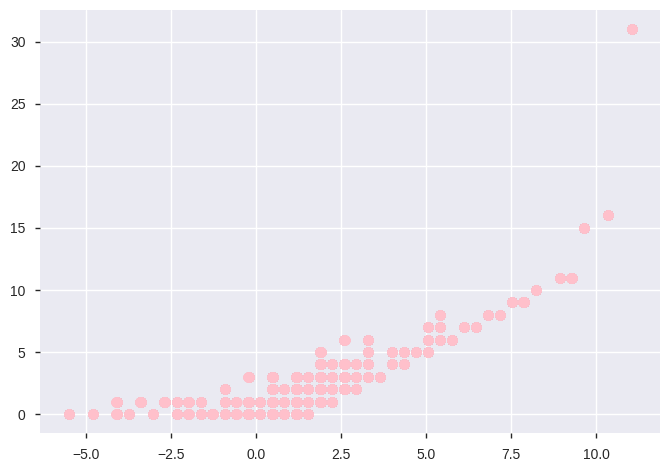

In [126]:
plt.scatter(y_pred, y_test,  color='pink')
plt.show()

In [127]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

1.1171517195571536

# Polynomial Regression

In [0]:
# model 1
# predicting the home team score
r = FIFA['rank'].values.reshape(-1,1)
hs = FIFA['home_score'].values

In [0]:
#splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(r, hs, test_size = 0.2, random_state=0)

In [130]:
# fitting polynomial regression into the data

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 6)
X_poly = poly_reg.fit_transform(r)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, hs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

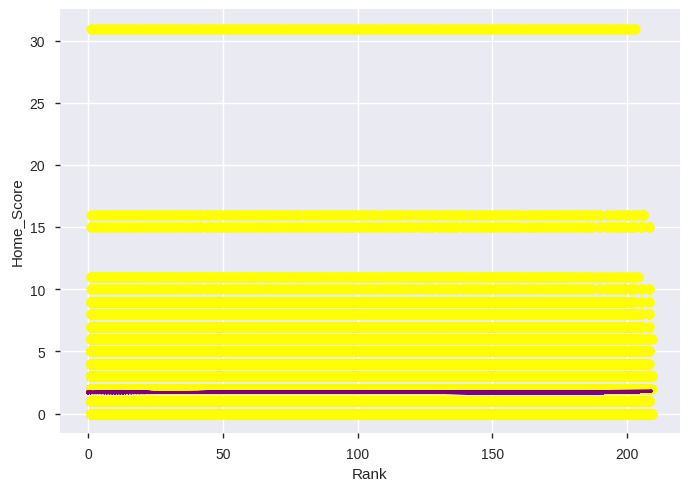

In [131]:
# the prediction
y_pred = pol_reg.predict(X_poly)
y_pred
#
#Visualization of the results
plt.scatter(X.iloc[:,0], y.iloc[:,0], color='yellow')
plt.plot(X, pol_reg.predict(X_poly), color='purple')
plt.xlabel('Rank')
plt.ylabel('Home_Score')
plt.show()

In [132]:
# computing the model's accuracy through the use of RMSE
from sklearn.metrics import mean_squared_error
#
rmse = np.sqrt(mean_squared_error(y, y_pred))
#
print(rmse)

1.9698477222135216


In [0]:
# prediction of away team score

r = FIFA['rank'].values.reshape(-1,1)
AS = FIFA['away_score'].values

In [0]:
#splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(r, AS, test_size = 0.2, random_state=0)

In [135]:
# fitting polynomial regression into the data

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 6)
X_poly = poly_reg.fit_transform(r)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, AS)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

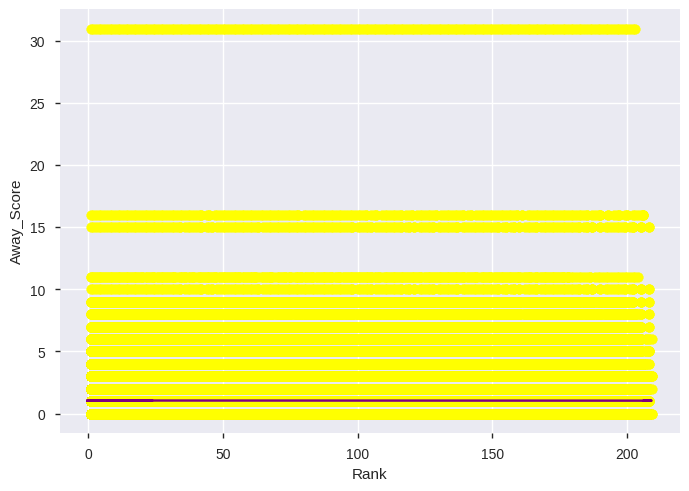

In [136]:
# the prediction
y_pred = pol_reg.predict(X_poly)
y_pred
#
#Visualization of the results
plt.scatter(X.iloc[:,0], y.iloc[:,0], color='yellow')
plt.plot(X, pol_reg.predict(X_poly), color='purple')
plt.xlabel('Rank')
plt.ylabel('Away_Score')
plt.show()

In [144]:
# Using critical value to find the heteroscedasticity
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_pred, results).sgn*np.log(prices.iloc[:,1])*volumes.iloc[:,1]])
# # To interpret the results we must also compute a critical value of the chi squared distribution
# degree_of_freedom = len(y_pred)-1
# probability = 1 - p_value
# critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
# print(critical_value)
# ## comparing the critical value and the test result
# if (test_result > critical_value):
#   print('the variances are unequal, and the model should be reassessed')
# else:
#   print('the variances are homogeneous hence equal!')

ValueError: ignored

# Logistic Regression

In [0]:
# Predicting home score

X = FIFA[['rank','result_num','neutral_num']]
y = FIFA[['home_score']]
#splitting the dataset into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [139]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("The training set accuracy is: ", '%.3f'%(score))
print("The test set accuracy is: ", '%.3f'%(score2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The training set accuracy is:  0.313
The test set accuracy is:  0.308


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
# predicting away scores


X = FIFA[['rank','result_num','neutral_num']]
y = FIFA[['away_score']]

#splitting the dataset into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

In [141]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("The training set accuracy is: ", '%.3f'%(score))
print("The test set accuracy is: ", '%.3f'%(score2))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The training set accuracy is:  0.425
The test set accuracy is:  0.427


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 7. Implementing the Solution

In [0]:
# Implementing the Solution
# 

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [0]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?